# Curvas de Aprendizado

In [4]:
from aurelio.plotter import collect, collect_zip
import os
import pandas as pd
import seaborn as sns

In [6]:
exps = [
    "elmo_expanded_100",
    "elmo_reduced_train_100"
]

dfs = {}
for exp in exps:
    if ".zip" not in exp:
        path = "{}/metrics/{}".format(os.getcwd(), exp)
        dfs[exp] = pd.DataFrame.from_records(collect(path, exp))
    else:
        dfs[exp] = pd.DataFrame.from_records(collect_zip(exp, exp))
#dfs["metrics_kfold_dev_reduced_elmo.zip"].head()

In [8]:
def plot_perc(dfs, names, metric):
    dfs = pd.concat([dfs[name] for name in names])
    sns.set(rc={'figure.figsize':(15,10)})
    sns.lineplot(x="perc", y=metric, data=dfs, hue="name")

## Respostas múltiplas vs simples (100% train only): ELMO / k-fold

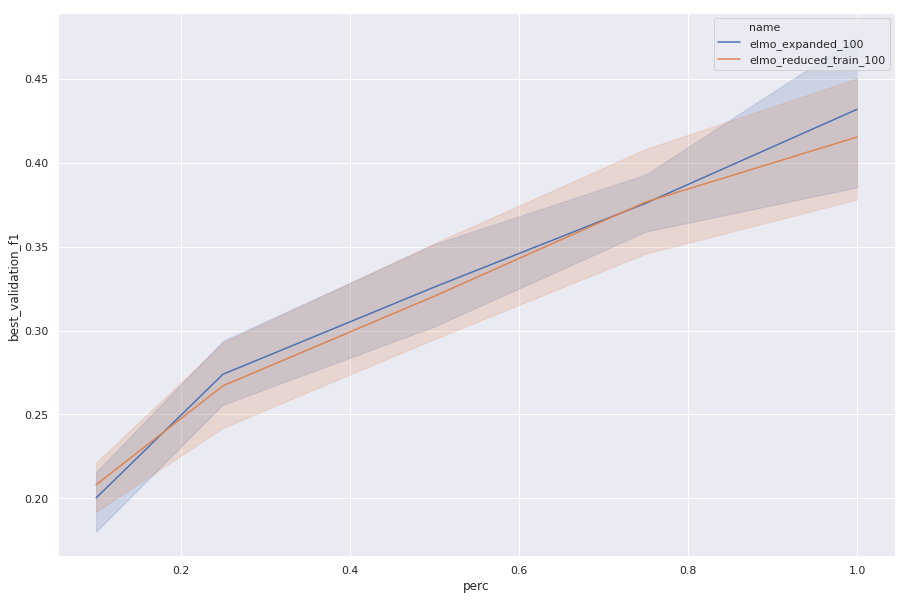

In [10]:
plot_perc(dfs, ["elmo_expanded_100", "elmo_reduced_train_100"], "best_validation_f1")

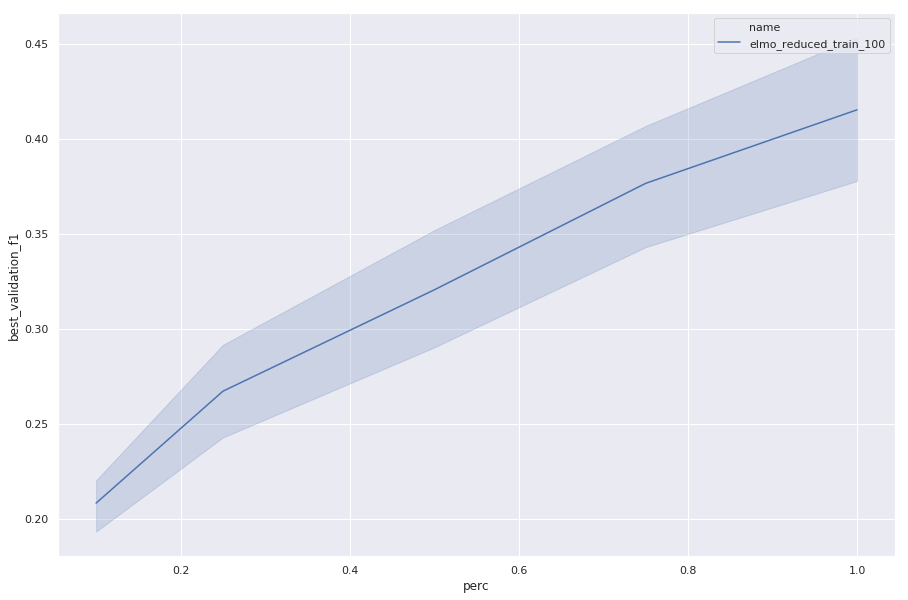

In [9]:
plot_perc(dfs, ["elmo_reduced_train_100"], "best_validation_f1")